## DAC(DSA): Recap to Python - Part 2
### Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Step Process
1. Load Data
2. Inspect Data
3. Clean Data (if needed)
4. Explore + Visualise Data
5. Derive insights from Data Exploration/Visualisation

### Example 1: Forbes 2022 Dataset on Billionaires|

#### 1. Load Data

In [2]:
forbes = pd.read_csv('./2022_forbes_billionaires.csv')

forbes

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...,...
2595,2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail


#### 2. Inspect Data

In [3]:
forbes.duplicated() #If True, means duplicate

0       False
1       False
2       False
3       False
4       False
        ...  
2595    False
2596    False
2597    False
2598    False
2599    False
Length: 2600, dtype: bool

In [4]:
forbes.duplicated().sum()

0

In [5]:
forbes.isnull().sum()

Unnamed: 0    0
rank          0
name          0
networth      0
age           0
country       0
source        0
industry      0
dtype: int64

In [6]:
#if has null value
#forbes.dropna()

In [7]:
#Check data type, see if the type makes sense
forbes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2600 non-null   int64 
 1   rank        2600 non-null   int64 
 2   name        2600 non-null   object
 3   networth    2600 non-null   object
 4   age         2600 non-null   int64 
 5   country     2600 non-null   object
 6   source      2600 non-null   object
 7   industry    2600 non-null   object
dtypes: int64(3), object(5)
memory usage: 162.6+ KB


#### 3. Clean Data

In [8]:
#Dtype is object indicates a generic type that can represent any Python object, including string, numbers..
#for a dataframe in pandas, it usually represents string

#Replace the $ and B with empty string
#str.replace(oldvalue,newvalue,count)
forbes['networth'] = forbes['networth'].str.replace('$','')
forbes['networth'] = forbes['networth'].str.replace('B','')

#OR
'''
"\$(\d+).*" - is a regex string that is pattern to find its mathing text

Each character has its own Expression. Eg: '\d' is a expression for any digit , '+' is to find one or more  , '.' is any single character

"https://regex101.com/" , you can use this site to test out regular expression as well as more information

'''
#forbes['networth'] = forbes['networth'].str.extract(r'\$(\d+).*')

#Change type to numeric
forbes['networth'] = pd.to_numeric(forbes['networth'])
#OR forbes['networth'] = forbes['networth'].apply(pd.to_numeric)

<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Sibi\AppData\Local\Temp\ipykernel_41636\87173152.py:10: SyntaxWarning: invalid escape sequence '\$'
  '''


#### 4. Explore Data

In [9]:
forbes.head()

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments


In [10]:
# Finding the industry with the highest number of billionaires
#value_counts() counts the frequency of unique values in specific columns of a dataframe
forbes['industry'].value_counts().sort_index()

industry
Automotive                      69
Construction & Engineering      43
Diversified                    178
Energy                          93
Fashion & Retail               246
Finance & Investments          386
Food & Beverage                201
Gambling & Casinos              23
Healthcare                     212
Logistics                       35
Manufacturing                  322
Media & Entertainment           95
Metals & Mining                 67
Real Estate                    189
Service                         51
Sports                          26
Technology                     329
Telecom                         35
Name: count, dtype: int64

In [11]:
# To display the top 5 industries with the most number of billionaires
forbes['industry'].value_counts()[:5]

industry
Finance & Investments     386
Technology                329
Manufacturing             322
Fashion & Retail          246
Healthcare                212
Name: count, dtype: int64

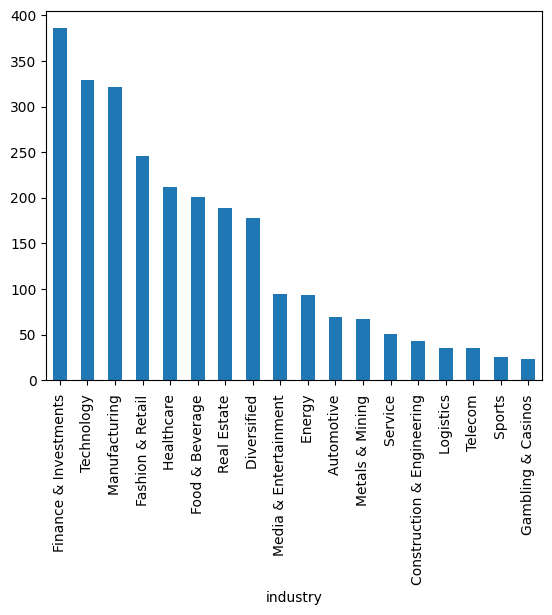

In [12]:
# show the number of billionaires in each industry with bar chart
forbes['industry'].value_counts().plot(kind = 'bar')

plt.show()

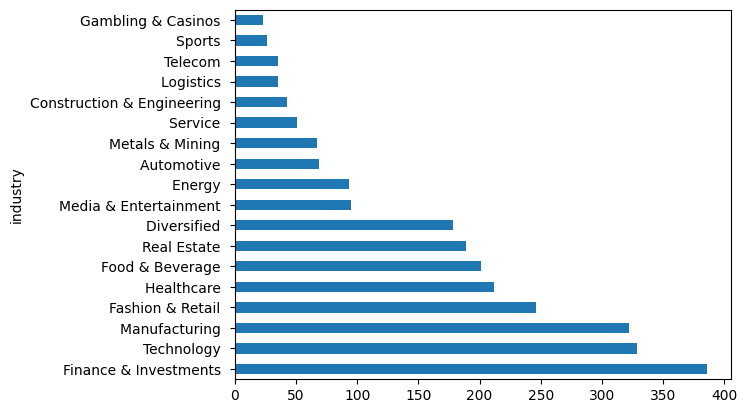

In [13]:
forbes['industry'].value_counts().plot(kind = 'barh') #Horizontal bar
plt.show()

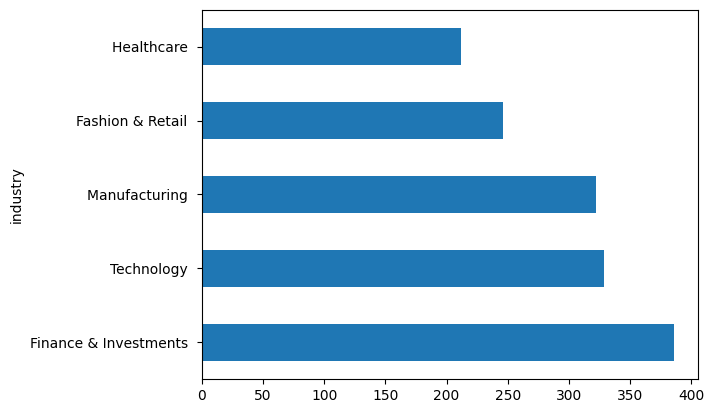

In [14]:
forbes['industry'].value_counts()[:5].plot(kind = 'barh')
plt.show()

In [15]:
# Finding the country with the highest number of billionaires

forbes['country'].value_counts()

country
United States           719
China                   515
India                   161
Germany                 130
Russia                   81
                       ... 
Venezuela                 1
Portugal                  1
Algeria                   1
Eswatini (Swaziland)      1
Estonia                   1
Name: count, Length: 75, dtype: int64

In [16]:
#display the top 3 countries with the most billionaries
forbes['country'].value_counts()[0:3]

country
United States    719
China            515
India            161
Name: count, dtype: int64

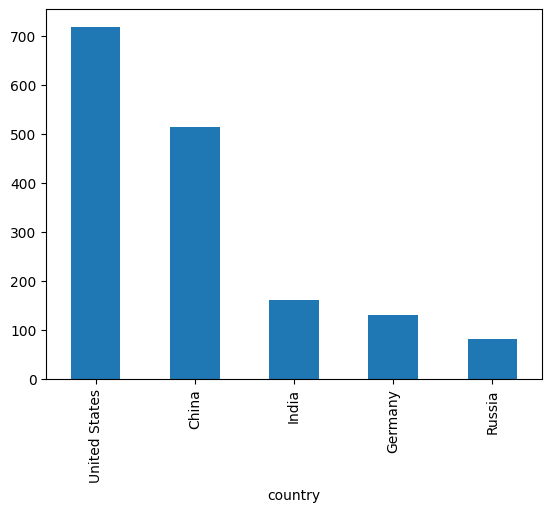

In [17]:
forbes['country'].value_counts()[0:5].plot(kind = 'bar')

plt.show()

In [18]:
# Find the billionaires with networth more than 60 billion dollars
#To filter a dataframe base on a condition, we need to use dataframe[condition] where the condition is a boolean expression
#condition=forbes['networth']>=60,True-more than or equal 60, False-less than 60
forbes[forbes['networth'] >= 60]

# OR

forbes.query('networth >= 60 ')

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
5,5,6,Larry Page,111.0,49,United States,Google,Technology
6,6,7,Sergey Brin,107.0,48,United States,Google,Technology
7,7,8,Larry Ellison,106.0,77,United States,software,Technology
8,8,9,Steve Ballmer,91.4,66,United States,Microsoft,Technology
9,9,10,Mukesh Ambani,90.7,64,India,diversified,Diversified


# Find the top 5 youngest billionaires

In [19]:
# rearrange the dataframe by ascending or descending order of specific column
#parameter of sort_values: by-specify label to sort by, axis:0 or 1, ascending:True or False
forbes.sort_values(by=['age'])

,Unnamed: 0,rank,name,networth,age,country,source,industry
1311,1311,1292,Kevin David Lehmann,2.4,19,Germany,drugstores,Fashion & Retail
2062,2062,1929,Wang Zelong,1.5,25,China,chemicals,Metals & Mining
1975,1975,1929,Pedro Franceschi,1.5,25,Brazil,fintech,Finance & Investments
2190,2190,2190,Alexandra Andresen,1.3,25,Norway,investments,Diversified
1961,1961,1929,Henrique Dubugras,1.5,26,Brazil,fintech,Finance & Investments
...,...,...,...,...,...,...,...,...
1939,1939,1929,Ana Maria Brescia Cafferata,1.5,97,Peru,"mining, banking",Diversified
1273,1273,1238,Charles Munger,2.5,98,United States,Berkshire Hathaway,Finance & Investments
1377,1377,1341,David Murdock,2.3,98,United States,"Dole, real estate",Food & Beverage
162,162,163,Robert Kuok,11.7,98,Malaysia,"palm oil, shipping, property",Diversified


In [20]:
forbes.sort_values(by = ['age'])[:5]

,Unnamed: 0,rank,name,networth,age,country,source,industry
1311,1311,1292,Kevin David Lehmann,2.4,19,Germany,drugstores,Fashion & Retail
2062,2062,1929,Wang Zelong,1.5,25,China,chemicals,Metals & Mining
1975,1975,1929,Pedro Franceschi,1.5,25,Brazil,fintech,Finance & Investments
2190,2190,2190,Alexandra Andresen,1.3,25,Norway,investments,Diversified
1961,1961,1929,Henrique Dubugras,1.5,26,Brazil,fintech,Finance & Investments


In [21]:
# Finding the top 5 youngest people who have networth of more than 50 billion
forbes_more_50 = forbes[forbes['networth'] >= 50]

#Or
forbes_more_50 = forbes.query('networth >= 50')

forbes_more_50

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
5,5,6,Larry Page,111.0,49,United States,Google,Technology
6,6,7,Sergey Brin,107.0,48,United States,Google,Technology
7,7,8,Larry Ellison,106.0,77,United States,software,Technology
8,8,9,Steve Ballmer,91.4,66,United States,Microsoft,Technology
9,9,10,Mukesh Ambani,90.7,64,India,diversified,Diversified


In [22]:
forbes_more_50.sort_values(by = ['age'])[0:5]

,Unnamed: 0,rank,name,networth,age,country,source,industry
14,14,15,Mark Zuckerberg,67.3,37,United States,Facebook,Technology
24,24,25,Zhang Yiming,50.0,38,China,TikTok,Media & Entertainment
19,19,19,Changpeng Zhao,65.0,44,Canada,cryptocurrency exchange,Finance & Investments
6,6,7,Sergey Brin,107.0,48,United States,Google,Technology
5,5,6,Larry Page,111.0,49,United States,Google,Technology


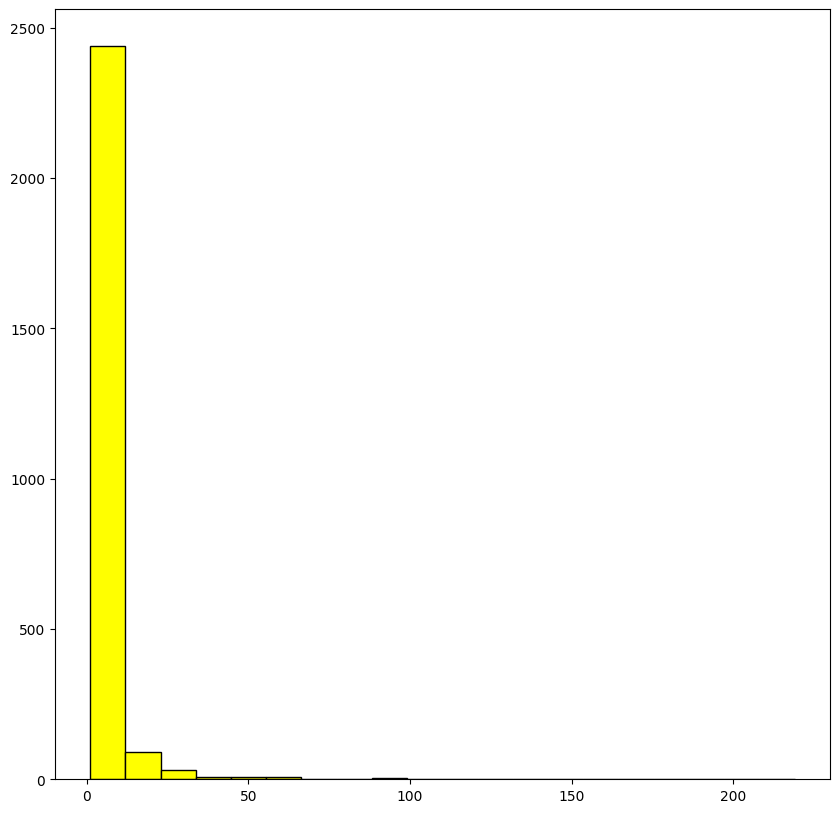

In [23]:
#Using the method we used previously
fig, ax = plt.subplots(figsize = (10,10))
ax.hist(forbes.networth, bins = 20, edgecolor = 'black', color = 'yellow') 
# the higher the bin, the closer it is to the distribution plot which will be explained later
plt.show() #Notice the graphs are still similar to each other

##### Data Visualisation - Distribution Plot
- Shows how a variable in your data is distributed

# Distribution Plot

> parameter:
* data: dataframe name
* x,y,hue: variable name
* kind:{“hist”, “kde”, “ecdf”} hist by default, same as histplot(), kdeplot(), ecdfplot(univariate data only)
* color, palette, height...

1.   kernel density estimation:KDE represents the data using a continuous probability density curve, more smooth
2.    empirical cumulative distribution function: represents the proportion or counts of observations


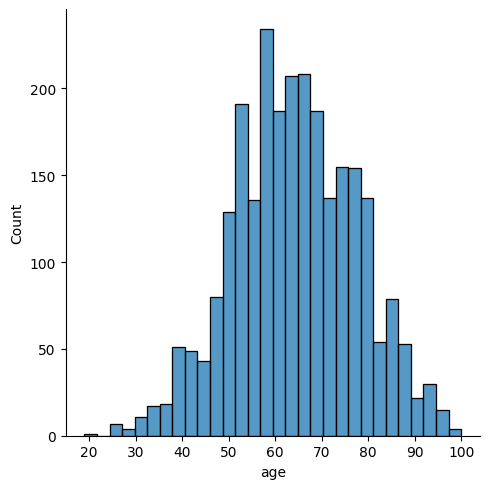

In [24]:
#Distribution plot of the age variable
sns.displot(x = 'age', data = forbes)
plt.show()

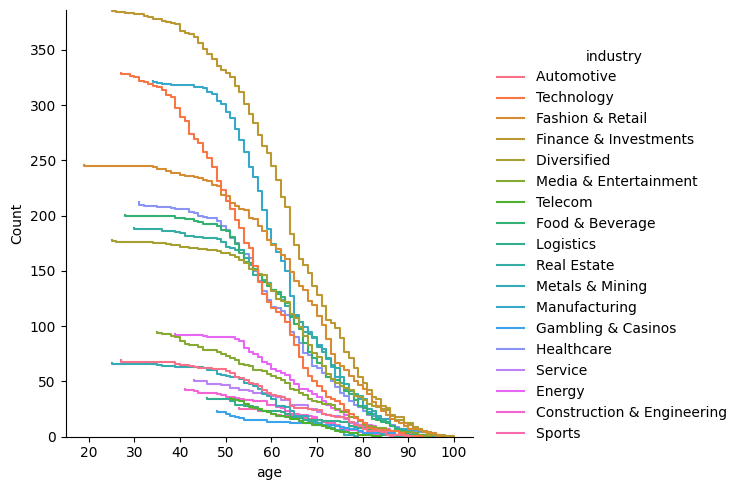

In [25]:
sns.displot(x = 'age',hue='industry',kind='ecdf', data = forbes, stat='count',complementary=True)
plt.show()

Observation from dataset:
1. Most saturated industry/best industry (Finance & Investments)
2. Country with the most opportunity (US) - may be too saturated
3. Who to learn from (THose that really made it)
4. Probable age for someone to get really rich (50-70 years old)

### Example 2: Annual Sales 2018 Data

#### 1. Load Data

In [32]:
data = pd.read_csv('./2018_Annual_Sales.csv')

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### 2. Inspect Data

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


#### 3. Clean Data

In [35]:
#Remove rows with missing values
df = data.dropna()

#Convert 'Quantity Ordered' and 'Price Each' to numeric
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

#Convert 'Order Date' column into datetime type
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

#Remove any duplicate rows
df = df.drop_duplicates()

df.info()

C:\Users\Sibi\AppData\Local\Temp\ipykernel_41636\3685969344.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
C:\Users\Sibi\AppData\Local\Temp\ipykernel_41636\3685969344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
C:\Users\Sibi\AppData\Local\Temp\ipykernel_41636\3685969344.py:9: UserWarning: Could not infer format, so each element will be parsed indivi

<class 'pandas.core.frame.DataFrame'>
Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185687 non-null  object        
 1   Product           185687 non-null  object        
 2   Quantity Ordered  185686 non-null  float64       
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185687 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 9.9+ MB


C:\Users\Sibi\AppData\Local\Temp\ipykernel_41636\3685969344.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


In [36]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


#### 4. Explore Data

In [37]:
# series.dt can be used to access the values of the series as datetimelike and return several properties
#dt.year will return year, dt.weekday will return the day of week
df['Year'] = df['Order Date'].dt.year
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019.0
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019.0
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019.0
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019.0
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019.0


In [38]:
#Which month had the best sales?
df['Month'] = df['Order Date'].dt.month
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019.0,4.0
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019.0,4.0
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019.0,4.0
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019.0,4.0
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019.0,4.0


In [39]:
#creat a new column called Sale
df['Sales'] = df['Price Each']*df['Quantity Ordered']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019.0,4.0,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019.0,4.0,99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019.0,4.0,600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019.0,4.0,11.99
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019.0,4.0,11.99


In [41]:
#Extract month from 'Order Date'
df['Month'] = df['Order Date'].dt.month

#Group by 'Month'
groupby_month = df.groupby('Month')

#Sum sales for each month
gross_sales_by_month = groupby_month['Sales'].sum().sort_values()

#Display result
print(gross_sales_by_month)


Month
1.0     1821413.16
9.0     2094465.69
2.0     2200078.08
8.0     2241083.37
6.0     2576280.15
7.0     2646461.32
3.0     2804973.35
5.0     3150616.23
11.0    3197875.05
4.0     3389217.98
10.0    3734777.86
12.0    4608295.70
Name: Sales, dtype: float64


In [42]:
#here Month is index label not variable
gross_sales_by_month.index

Index([1.0, 9.0, 2.0, 8.0, 6.0, 7.0, 3.0, 5.0, 11.0, 4.0, 10.0, 12.0], dtype='float64', name='Month')

#### Data Visualisation

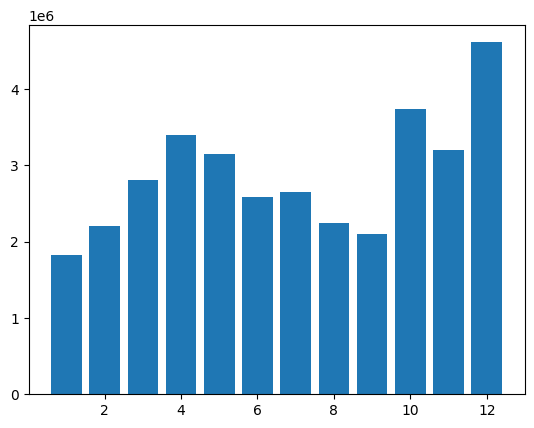

In [44]:
#Data Visualisation
plt.bar(gross_sales_by_month.index, gross_sales_by_month)
plt.show()

In [46]:
def city_from_address(address):
    try:
        # Split the address by commas
        substrs = address.split(',')
        
        # Ensure there are at least 2 parts (city is the second part)
        if len(substrs) >= 2:
            city = substrs[1].strip()
        else:
            city = None  # Return None if the format is unexpected
    except Exception as e:
        city = None  # If something goes wrong, return None
    
    return city

# Apply the function to create a new 'City' column
df['City'] = df['Purchase Address'].apply(city_from_address)

# Check the first few rows of the dataframe
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019.0,4.0,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019.0,4.0,99.99,Boston
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019.0,4.0,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019.0,4.0,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019.0,4.0,11.99,Los Angeles


In [48]:
# Group by city
groupby_city = df.groupby('City')

# Sum only the 'Sales' column for each city
gross_sales_by_city = groupby_city['Sales'].sum()

# Display the result
print(gross_sales_by_city)

City
Atlanta          2794199.07
Austin           1818044.33
Boston           3658627.65
Dallas           2765373.96
Los Angeles      5448304.28
New York City    4661867.14
Portland         2319331.94
San Francisco    8254743.55
Seattle          2745046.02
Name: Sales, dtype: float64


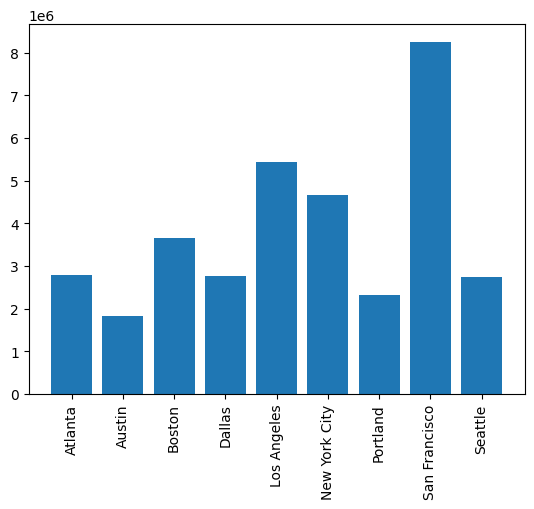

In [49]:
plt.bar(gross_sales_by_city.index,gross_sales_by_city)

plt.xticks(rotation = 90)
plt.show()

In [52]:
#Which city makes the best sales across all 12 months

#Extract month from 'Order Date' if not already done
df['Month'] = df['Order Date'].dt.month

#Group by both 'Month' and 'City' and sum the 'Sales' column
groupby_data = df.groupby(['Month', 'City'])['Sales'].sum()

#Display the result
print(groupby_data)





Month  City         
1.0    Atlanta           149159.54
       Austin             88087.06
       Boston            201057.75
       Dallas            143450.52
       Los Angeles       288589.95
                           ...    
12.0   Los Angeles       682740.98
       New York City     646508.85
       Portland          303461.13
       San Francisco    1105582.13
       Seattle           386005.95
Name: Sales, Length: 108, dtype: float64


In [53]:
#Sum sales by city across all months
total_sales_by_city = groupby_data.groupby('City').sum()

#Sort cities by total sales and find the city with the highest sales
best_city = total_sales_by_city.sort_values(ascending=False).head(1)

#Display the result
print(best_city)

City
San Francisco    8254743.55
Name: Sales, dtype: float64


In [54]:
#display information of gross sales in every city for 1st 3 months
#loc, accedd a group of rows based on positional index
# group_data.loc[3,:] means select a specific row based on 3 and all its columns
#why use []? In pandas, using [] to access elements form df, () for function calls
groupby_data.loc[1:3, : ]

Month  City         
1.0    Atlanta          149159.54
       Austin            88087.06
       Boston           201057.75
       Dallas           143450.52
       Los Angeles      288589.95
       New York City    259829.34
       Portland         114985.56
       San Francisco    435561.39
       Seattle          140692.05
2.0    Atlanta          176458.31
       Austin           108358.52
       Boston           213612.59
       Dallas           186656.00
       Los Angeles      341958.68
       New York City    305372.26
       Portland         149439.87
       San Francisco    546891.60
       Seattle          171330.25
3.0    Atlanta          231605.38
       Austin           154391.59
       Boston           301023.81
       Dallas           222373.69
       Los Angeles      429613.58
       New York City    367226.31
       Portland         186948.03
       San Francisco    693102.14
       Seattle          218688.82
Name: Sales, dtype: float64

In [55]:
# Can query individual cities (Example: Atlanta)
groupby_data.loc[1:3,'Atlanta']

Month  City   
1.0    Atlanta    149159.54
2.0    Atlanta    176458.31
3.0    Atlanta    231605.38
Name: Sales, dtype: float64

In [56]:
#query each month sales for specific city
groupby_data.loc[:,'Boston']

Month
1.0     201057.75
2.0     213612.59
3.0     301023.81
4.0     353392.17
5.0     328791.70
6.0     254461.17
7.0     291478.35
8.0     239260.31
9.0     248231.83
10.0    367003.51
11.0    350834.08
12.0    509480.38
Name: Sales, dtype: float64

# create a line chart to show how the sale change in each city for 12 months?

In [57]:
# Get a list of cities
cities = df['City'].unique() #so there will be no duplicate
cities

array(['Dallas', 'Boston', 'Los Angeles', 'San Francisco', 'Seattle',
       'Atlanta', 'New York City', 'Portland', 'Austin', None],
      dtype=object)

City 'None' not found in groupby_data.


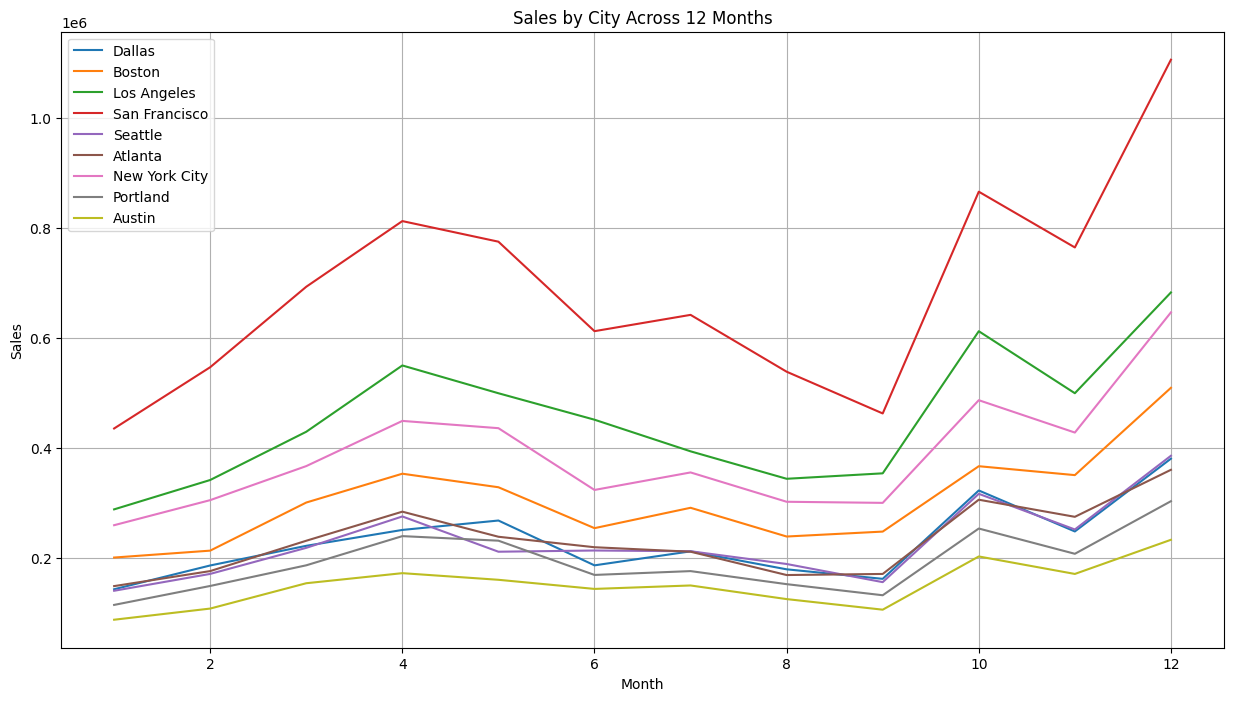

In [63]:
fig, ax = plt.subplots(figsize=(15, 8))

for city in cities:
    #Check if the city exists in the groupby_data index,
    #the get_level_values() method in Pandas is used to access the values of a specific level from a MultiIndex.
    if city in groupby_data.index.get_level_values('City'):
        
        #Get the city's 12 months of sales
        current_sales = groupby_data.xs(city, level='City')
        #The .xs() method is used to filter a specific level of a MultiIndex (in this case, City). 

        #Plot line plot for this city
        ax.plot(current_sales.index, current_sales.values, label=city)  # Month on x-axis, Sales on y-axis
    else:
        print(f"City '{city}' not found in groupby_data.")

plt.grid()
plt.legend()
plt.title("Sales by City Across 12 Months")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()
